# Ecuación de Mathieu 


#### Derivación de dos soluciones de primer tipo y código para soluciones mediante métodos númericos (Runge Kutta y usando la 

#### paqueteria scipy.integrate.odeint)

La ecuación de Mathieu es una ecuación diferencial clásica ordinaria (EDO) lineal de segundo orden, que difiere del oscilador armónico simple en la existencia de un forzamiento variable en el tiempo (periódico) del coeficiente de rigidez. Su forma explícita está dada por

\begin{equation}
    \dfrac{d^2y}{dz^2}(a + 2q\cos (2z))y = 0
\end{equation}

donde $a$ y $q$ son parámetros constantes y $z$ es la variable independiente. 

### Caso 1. q = 0 
Si $q=0$ entonces se tiene la ecuación 

\begin{equation}
    \dfrac{d^2y}{dz^2}+ ya = 0
\end{equation}

nótese que se obtiene la ecuación del oscilador armónico simple, el parámetro de rigidez $a$ va a ser el cuadrado de su frecuencia natural (comunmente denotada por $\omega_0$)

\begin{equation}
    \omega_0 = \sqrt{a}
\end{equation}

si ahora denotamos $a = m^2 = 1,2,3,4 \dots$ tenemos las solución + $\cos z$, $\sin z$, $\cos 2z$, $\sin 2z$ (con la solución general $\cos mz$ y $\sin(mz)$, adoptando la convención de que sus coeficientes son la unidadad). 
Cuando $q\neq 0$ entonces el movimiento puede permanecer acotado (caso estable) o el movimiento se vuelve no acotado (caso inestable). La ocurrencia de estos dos resultados depende de la combinación de los prámetros $a$ y $q$ 

### Caso 2. Soluciones periódicas con periodo $\pi$ o $2\pi$ de primer tipo ($m^2=1$ y $q\neq 0$ )  
### - $C e_1(z,q)$ 
Para tener soluciones periódicas con periodo $\pi$ o $2\pi$ $a$ será función de $q$. Escribiendo a $a$ como una serie de potencias de $q$ 

\begin{equation}
    a = m^2 + \alpha_1 q + \alpha_2 q^2 + \alpha_3 q^3 \dots  
\end{equation}

Notemos que cuando $q=0$ la solución debe ser $\cos z$ pues estamos tomando $m^2 = 1$ por lo que proponemos la solución 

\begin{equation}
    y = \cos z + qC_1(z)+q^2C_2(z)+q^3C_3(z)+\dots
\end{equation}

calculando la segunda derivada 

\begin{align}
    \begin{split}
        y'' = -\cos z + qC_1''+q^2C_2''+q^3C_3''+\dots 
    \end{split}
\end{align}

sustituyendo la solución propuesta para calcular $ya$

\begin{align}
    \begin{split}
        ya & = \cos z(1 +\alpha_1q+\alpha_2q^2+\alpha_3q^3+\dots)\\
        & + qC_1(1 +\alpha_1q+\alpha_2q^2+\alpha_3q^3+\dots)\\
        & + q^2C_2(1 +\alpha_1q+\alpha_2q^2+\alpha_3q^3+\dots)\\
        & + q^3C_3(1 +\alpha_1q+\alpha_2q^2+\alpha_3q^3+\dots)\\
        & \vdots \\
        & = \cos z + q(C_1+\alpha_1\cos z)+q^2(C_2+\alpha_1\alpha_1C_1+\alpha_2\cos z)\\
        & + q^3(C_3+C_2\alpha_1+\alpha_2C_1+\alpha_3\cos z)+\dots 
    \end{split}
\end{align}

sustituyendo la solución propuesta para calcular $-(2q\cos 2z)y$

\begin{align}
    \begin{split}
        -(2q\cos 2z)y & = -(2q\cos 2z)(\cos z + qC_1 + q^2C_2 +q^3C_3 +\dots)\\
        & = -q(2\cos 2z\cos z)-2q^2C_1\cos 2z-2q^3C_2\cos2z-2q^4C_3\cos2z+\dots\\
        & = -q(\cos z +\cos 3z) -2q^2C_1\cos 2z-2q^3C_2\cos2z-2q^4C_3\cos2z+\dots
    \end{split}
\end{align}

por lo que 

\begin{align}
    \begin{split}
        y''+ya-2q\cos (2z)\;y & = -\cos z + qC_1''+q^2C_2''+q^3C_3''+\dots  \\
        &  + \cos z + q(C_1+\alpha_1\cos z)+q^2(C_2+\alpha_1\alpha_1C_1+\alpha_2\cos z)\\
        & + q^3(C_3+C_2\alpha_1+\alpha_2C_1+\alpha_3\cos z)+\dots \\
        & -q(\cos z +\cos 3z) -2q^2C_1\cos 2z-2q^3C_2\cos2z-2q^4C_3\cos2z+\dots
    \end{split}
\end{align}

separando los coeficientes e igualando a cero cada uno pues la ecuación diferencia está igualada a cero 

\begin{align}
    \begin{split}
        q^0 & = \cos z -\cos z = 0\\
        q^1 & = qC_1''+q(C_1+\alpha_1\cos z)-q(\cos z +\cos 3z)\\
        & = qC_1'' + qC_1 + q\cos z(\alpha_1-1)-q\cos 3z\\
        & = q(C_1''+C_1+\underbrace{\cos z(\alpha_1-1)}_{\text{término no periódico}}-\cos 3z)\\
        & = 0
    \end{split}
\end{align}

buscamos soluciones periódicas por lo que el término no periódico debe ser cero, (al integrar esa ecuación diferencial obtenemos la función no periódica $(1-\alpha_1)z\sin(z)/2$) con lo que obtenemos

\begin{align}
    \begin{split}
        \cos z(\alpha_1 -1) = 0 \rightarrow \alpha_1 = 1\\
        C_1''+C_1 = \cos 3z
    \end{split}
\end{align}

al resolver para $C_1(z)$

\begin{equation}
    C_1(z) = -\dfrac{1}{8}\cos 3z
\end{equation}

ahora calculando los coeficientes de $q^2$ e igualándolos a cero 

\begin{align}
    \begin{split}
        q^2 & = q^2 C_2''+q^2(C_2 +\alpha_1C_1+\alpha_2\cos z)-2q^2C_1\cos2z\\
        & = q^2(C_2''+C_2+\alpha_1C_1+\alpha_2\cos z-2C_1\cos2z)\\
        & = 0
    \end{split}
\end{align}

sustituyendo el valor de $\alpha_1$ y $C_1$

\begin{align}
    \begin{split}
        C_2''+C_2+\alpha_1C_1+\alpha_2\cos z-2C_1\cos2z & = C_2''+C_2-\dfrac{1}{8}\cos 3z+\alpha_2\cos z-2\left(-\dfrac{1}{8}\cos 3z\right)\cos2z\\
        & = C_2''+C_2-\dfrac{1}{8}\cos 3z+\alpha_2\cos z+\dfrac{1}{4}\cos 3z\cos2z\\
        & = C_2''+C_2-\dfrac{1}{8}\cos 3z+\alpha_2\cos z+\dfrac{1}{4}\left(\dfrac{1}{2}\left(\cos z +\cos5z\right)\right)\\
        & = C_2''+C_2-\dfrac{1}{8}\cos3z+\cos z\left(\alpha_2+\dfrac{1}{8}\right)+\dfrac{1}{8}\cos 5z\\
        & = 0
    \end{split}
\end{align}

nuevamente al resolver para $C_2$ tenemos que hay un término no periódico dado por 

\begin{equation}
    \cos z\left(\alpha_2+\dfrac{1}{8}\right)
\end{equation}

entonces este término debe ser cero, con lo que obtenemos 

\begin{equation}
    \cos z\left(\alpha_2+\dfrac{1}{8}\right)= 0\rightarrow \alpha_2 = -\dfrac{1}{8} 
\end{equation}



## Runge-Kutta 

### Ecuación de Mathieu 

Basado en el código: https://github.com/matiot/duffing


In [1]:
# Importando librerías 

import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation


### Definiendo el método Runge-Kutta

In [2]:
def rk_paso(g, y0, t0, dt):
    """
    Ejecuta el paso Runge-Kutta
    
    g: ecuación a integrar 
    y0: lista de condiciones inciales 
    t0: tiempo inicial (Float)
    dt: paso de tiempo (Float)
    Te regresa: 
    y1: lista de compontentes de la función a un tiempo t1
    
    """
    c1 = g(y0        , t0        )*dt
    c2 = g(y0 + c1/2., t0 + dt/2.)*dt
    c3 = g(y0 + c2/2., t0 + dt/2.)*dt
    c4 = g(y0 + c3   , t0 + dt   )*dt
    
    return y0 + 1./6.*( c1 + 2.*c2 + 2.*c3 + c4 )


def rk(g, y0, t0, dt, n):
    """
    Ejecuta el método completo de Runge-Kutta para n pasos 
    
    g: ecuación a integrar 
    y0: lista de condiciones inciales 
    t0: tiempo inicial (Float)
    dt: paso de tiempo (Float)
    n: número de pasos (Integer) 
    Te regresa: 
    data: Una lista de tuplas (ti=tiempo, yy= lista de componetntes a de la función a l tiempo ti)
    
    """
    data = [ [t0, y0] ]
    for i in range(1,n):
        ti,yi = data[i-1]
        data.append( [ti + dt, rk_paso(g, yi, ti, dt)] )
    return data


def rk_reshape(data):
    """
    Transforma la estructura de dat en una matriz
    
    Sólo es compatible con funciones de dos valores (lista de dos elementos)
    data: lista de tupla (flotante, lista de flotantes)
    Te regresa: 
    data: matriz de...
    
    """
    t = []
    y = []
    v = []
    for i in range(len(data)):
        t.append(data[i][0])
        y.append(data[i][1][0])
        v.append(data[i][1][1])
    return np.array([ t, y, v ]).T
def rungekutta(g, y0, t0, dt, n):
	"""Execute a complete Runge-Kutta simultation for n step
	Keyword arguments:
	g -- integrand function
	y0 -- (list) initial data
	t0 -- (float) initial time
	dt -- (float) time step
	n -- (integer) number of time steps
	Return:
	data -- numpy matrix
	"""
	return rk_reshape( rk(g, y0, t0, dt, n) )

### Definiendo las funciones para el espacio fase y las series de tiempo 

In [3]:
def series_tiempo(data,titulo):
    """
    Gráfica las series de tiempo de la posición y la velocidad (y & y')
    
    """
    fig, ax = plt.subplots(figsize=(9, 7))
    plt.clf()
    t = []
    y = []
    v = []
    for i in range(len(data)):
        t.append(data[i][0])
        y.append(data[i][1][0])
        v.append(data[i][1][1])
    plt.plot(t,y,'r-',label='$x$', color='#5B284D')
    #plt.plot(t,v,'b.',markersize=0.3,label='$\dot{x}$') # ESTO ES PARA GRAFICAR PUNTOS 
    plt.plot(t,v,'b-',label='$\dot{x}$', color='#A88099')
    plt.axhline(0, color='gray', linestyle='dashed')
    plt.axvline(0, color='gray', linestyle='dashed')
    plt.xlabel(r'$t$')
    plt.legend(loc=1)
    plt.title(titulo)
    plt.show()
    return

def serie_p(data,titulo):
    """
    Serie de tiempo de la posición
    
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.clf()
    t = []
    y = []
    for i in range(len(data)):
        t.append(data[i][0])
        y.append(data[i][1][0])
    plt.plot(t,y,'r-',label='$y$',color='#5B284D')
    plt.axhline(0, color='gray', linestyle='dashed')
    plt.axvline(0, color='gray', linestyle='dashed')
    plt.xlabel(r'$z$')
    plt.legend(loc=1)
    plt.title(titulo)
    plt.show()
    return

def diagrama_fase(data,titulo):
    """
    Diagrama fase 
    
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.clf()
    t = []
    y = []
    v = []
    for i in range(len(data)):
        t.append(data[i][0])
        y.append(data[i][1][0])
        v.append(data[i][1][1])
    plt.plot(y[0],v[0],'og', color='#5B284D')
    plt.plot(y[-1],v[-1],'-gD', color='#5B284D')
    plt.axhline(0, color='gray', linestyle='dashed')
    plt.axvline(0, color='gray', linestyle='dashed')
    plt.plot(0,0,'om')
    #plt.scatter(y, v, marker='_')
    plt.plot(y,v,'r-',color='#5B284D')
    plt.xlabel('$y$')
    plt.ylabel('$\dot{y}$')
    plt.title(titulo)
    plt.show()
    return

### Definiendo el sistema 

In [4]:
def g_Mathieu(a,q):
    return lambda y,t: np.array([ y[1], -(a-2*q*np.cos(2*t))*y[0]])

Espera un poquito ...


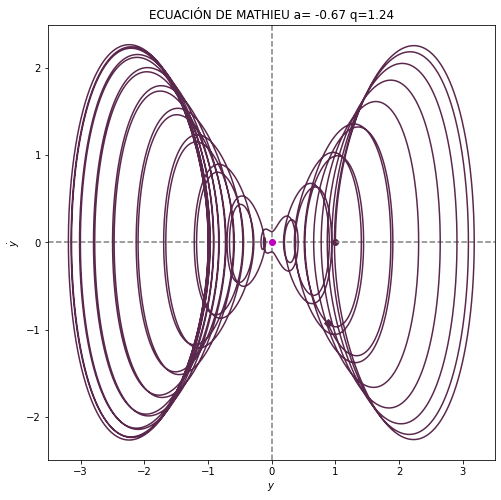

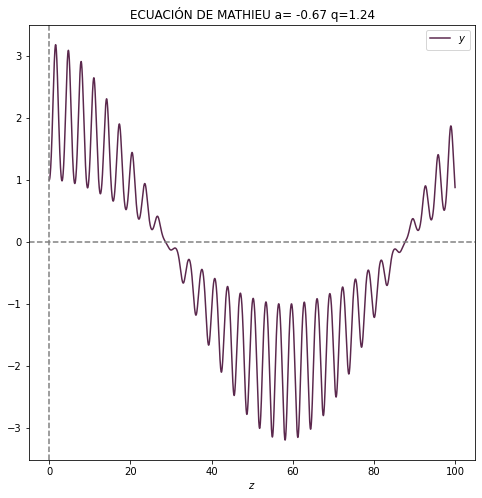

In [6]:
# DATOS Y PARÁMETROS 

#a = 2.3234
#q = 2.0
a = -0.67
q = 1.24
y = np.zeros(2)
y[0] = 1. 
y[1] = 0. 

t = 0.0
dt = 0.001
n = 100000

# SIMULACIÓN 

g = g_Mathieu(a,q)

print('Espera un poquito ...')
dat = rk(g, y, t, dt, n)
data = rungekutta(g, y, t, dt, n)
# VISUALIZACIÓN

titulo = 'ECUACIÓN DE MATHIEU a= '+str(a)+' q='+ str(q)
diagrama_fase(dat, titulo)
serie_p(dat, titulo)

### Usando la librería scipy 

In [16]:
# Importando 

import scipy as sp 
from scipy.integrate import odeint 
from scipy.integrate import solve_ivp

In [81]:
# Definiendo el sistema 

def dSdz(z, S):
    y, v = S
    a = 0.49
    q = 0.48
    A = v
    B = -(a-2*q*np.cos(2*z))*y
    return [A,B]
y_0 = 1
v_0 = 0
S_0 = (y_0,v_0)

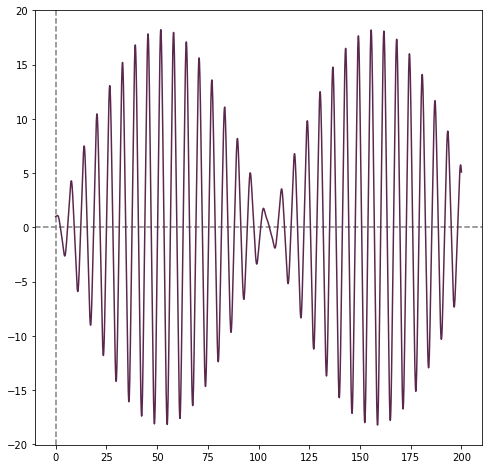

In [83]:
# Obteniendo la solución númerica y gráficado 

z = np.linspace(0,200,3000)
sol = odeint(dSdz, y0=S_0, t=z, tfirst=True)
y_sol = sol.T[0]
v_sol = sol.T[1]
fig, ax = plt.subplots(figsize=(8, 8))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.plot(z,y_sol,color='#5B284D')
#plt.plot(y_sol,v_sol,color='#5B284D')
#plt.plot(z,v_sol,label='$\dot{x}$', color='#A88099')